In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("ECG200_TRAIN.csv", delimiter="  ")
df

C:\Users\Bilal\AppData\Local\Temp\ipykernel_12644\2671051389.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("ECG200_TRAIN.csv", delimiter="  ")


,-1.0000000e+00,5.0205548e-01,5.4216265e-01,7.2238348e-01,1.4288852e+00,2.1365158e+00,2.2811490e+00,1.9362737e+00,1.4688900e+00,1.0088451e+00,...,9.3104294e-01,6.1029836e-01,6.3889427e-01,6.8467857e-01,5.8323764e-01,6.4052167e-01,7.0858515e-01,7.0501088e-01,7.1381545e-01,4.3376464e-01
0,1.0,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
1,-1.0,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
2,-1.0,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
3,1.0,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190
4,1.0,0.404733,1.280859,2.515148,1.299519,1.453432,0.474275,-1.396562,-0.647081,0.431945,...,0.376469,0.277811,0.225676,0.159091,0.408354,0.540015,-0.027791,0.203476,0.346964,0.339185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.0,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,...,1.002770,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546
95,-1.0,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,...,-0.136610,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463
96,-1.0,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,...,0.482452,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293
97,1.0,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,...,0.324323,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709


In [3]:
df.isnull().sum()

-1.0000000e+00    0
 5.0205548e-01    0
 5.4216265e-01    0
 7.2238348e-01    0
 1.4288852e+00    0
                 ..
 6.4052167e-01    0
 7.0858515e-01    0
 7.0501088e-01    0
 7.1381545e-01    0
 4.3376464e-01    0
Length: 97, dtype: int64

## Sparating the dataset with labels -1s and 1s, 70% for ones and 30% for the minus ones 

In [4]:
s = df.sort_values(by='-1.0000000e+00',ignore_index=True)
af = np.where(s['-1.0000000e+00'] == -1)
minusones = s[:30]
ones = s[30:]
kfold = []
len(ones)

69

## Making 4 patches of 1s and -1s
patches1 --> 1s  

patches2 --> -1s

In [5]:
g = 0
patches1 = []
for i in range(17,len(ones)+1,17):
    k = ones[g:i]
    patches1.append(k)
    g = i
    
g = 0
patches2 = []
for i in range(7,len(minusones)+1,7):
    k = minusones[g:i]
    patches2.append(k)
    g = i

Concatenating the datesets (patches) of 1s and -1s and shuffling the dataset

In [6]:
for i in range(0,4):
    biji = pd.concat([patches1[i],patches2[i]],axis=0)
    kfold.append(biji)

# shuffleing
for i in range(0,4):
    kfold[i] = kfold[i].sample(frac=1)

## Calculating the accuracies of differnt K-folds on machine learning Model (Random Forest)

In [7]:
accuracies = []

In [8]:
test = kfold[0]
train = pd.concat([kfold[1],kfold[2],kfold[3]],axis=0)
X_train = train.drop('-1.0000000e+00',axis=1)
y_train = train["-1.0000000e+00"]

X_test = test.drop('-1.0000000e+00',axis=1)
y_test = test["-1.0000000e+00"]

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print("ACCURACY: ", metrics.accuracy_score(y_test, y_pred))
accuracies.append(metrics.accuracy_score(y_test, y_pred))

ACCURACY:  0.7916666666666666


In [10]:
test = kfold[1]
train = pd.concat([kfold[0],kfold[2],kfold[3]],axis=0)
X_train = train.drop('-1.0000000e+00',axis=1)
y_train = train["-1.0000000e+00"]
X_test = test.drop('-1.0000000e+00',axis=1)
y_test = test["-1.0000000e+00"]

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print("ACCURACY: ", metrics.accuracy_score(y_test, y_pred))
accuracies.append(metrics.accuracy_score(y_test, y_pred))

ACCURACY:  0.875


In [12]:
test = kfold[2]
train = pd.concat([kfold[0],kfold[1],kfold[3]],axis=0)
X_train = train.drop('-1.0000000e+00',axis=1)
y_train = train["-1.0000000e+00"]
X_test = test.drop('-1.0000000e+00',axis=1)
y_test = test["-1.0000000e+00"]

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print("ACCURACY: ", metrics.accuracy_score(y_test, y_pred))
accuracies.append(metrics.accuracy_score(y_test, y_pred))

ACCURACY:  0.8333333333333334


In [14]:
test = kfold[2]
train = pd.concat([kfold[0],kfold[1],kfold[3]],axis=0)
X_train = train.drop('-1.0000000e+00',axis=1)
y_train = train["-1.0000000e+00"]
X_test = test.drop('-1.0000000e+00',axis=1)
y_test = test["-1.0000000e+00"]

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print("ACCURACY: ", metrics.accuracy_score(y_test, y_pred))
accuracies.append(metrics.accuracy_score(y_test, y_pred))

ACCURACY:  0.8333333333333334


In [16]:
print(accuracies)
print(sum(accuracies)/4)

[0.7916666666666666, 0.875, 0.8333333333333334, 0.8333333333333334]
0.8333333333333334


## using Sklearn

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('-1.0000000e+00',axis=1)
y = df['-1.0000000e+00']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=60)

clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("ACCURACY: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY:  0.8666666666666667


In [34]:
def check(x):
    c1 = 0
    c2 = 0
    for i in x:
        if i == -1:
            c1+=1
        else:
            c2+=1
    print('1s', c1)
    print('-1s', c2)

In [35]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=4,shuffle=True) #  the split - into 4 folds 
accuracies_sklearn = []
for train_index, test_index in kf.split(X):   #kf.split splits the dataset 
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    check(y_train)
    clf = RandomForestClassifier(n_estimators = 100)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("ACCURACY: ", acc)
    accuracies_sklearn.append(acc)

TRAIN: 74 TEST: 25
1s 21
-1s 53
ACCURACY:  0.72
TRAIN: 74 TEST: 25
1s 22
-1s 52
ACCURACY:  0.84
TRAIN: 74 TEST: 25
1s 24
-1s 50
ACCURACY:  0.84
TRAIN: 75 TEST: 24
1s 23
-1s 52
ACCURACY:  0.8333333333333334


In [20]:
print(accuracies_sklearn)
print(sum(accuracies_sklearn)/4)

[0.8, 0.8, 0.72, 0.875]
0.7987500000000001


## Results
The average accuracy results of Numpy are better than sklearn but not considerably much. 

In [21]:
print("Average  with numpy",sum(accuracies)/4)
print("Average  with sklearn",sum(accuracies_sklearn)/4)

Average  with numpy 0.8333333333333334
Average  with sklearn 0.7987500000000001


Plots of Accuracies with numpy and Sklearn

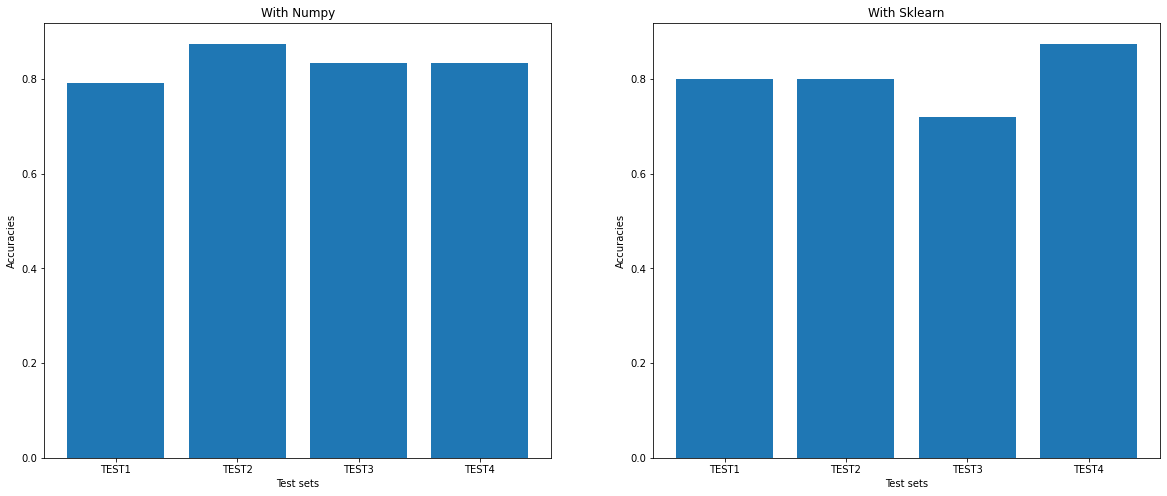

In [22]:
import matplotlib.pyplot as plt

# Figure Size
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title("With Numpy")
plt.xlabel("Test sets")
plt.ylabel("Accuracies")
x = np.array(["TEST1", "TEST2", "TEST3", "TEST4"])
plt.bar(x,accuracies)

plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.title("With Sklearn")
plt.xlabel("Test sets")
plt.ylabel("Accuracies")
x = np.array(["TEST1", "TEST2", "TEST3", "TEST4"])
plt.bar(x,accuracies_sklearn)

plt.show()